<a href="https://colab.research.google.com/github/Sayandeep27/Statistics/blob/main/Maximizing_Revenue_for_Taxi_Cab_Drivers_through_Payment_Type_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
taxi_data = pd.read_csv("yellow_tripdata_2020-01.csv")

In [3]:
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1,1.2,1,N,238,239,1,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1,1.2,1,N,239,238,1,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1,0.6,1,N,238,238,1,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1,0.8,1,N,238,151,1,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [4]:
taxi_data.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
22535,2,2020-01-01 01:05:08,2020-01-01 01:19:32,2,1.83,1,N,140,161,2,11.0,0.5,0.5,0.00,0.0,0.3,14.80,2.5
22536,2,2020-01-01 01:31:03,2020-01-01 01:40:37,1,1.45,1,N,161,161,1,8.0,0.5,0.5,2.36,0.0,0.3,14.16,2.5
22537,2,2020-01-01 01:45:22,2020-01-01 02:09:36,1,5.30,1,N,229,87,1,21.5,0.5,0.5,5.06,0.0,0.3,30.36,2.5
22538,1,2020-01-01 01:49:42,2020-01-01 01:58:20,1,2.00,1,N,229,236,1,9.0,3.0,0.5,3.50,0.0,0.3,16.30,2.5
22539,2,2020-01-01 01:03:58,2020-01-01 01:22:57,1,3.50,1,N,68,140,1,14.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# rows and columns of the dataset
taxi_data.shape

(22540, 18)

In [6]:
# converting pickup and dropoff to datetime
taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'])
taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data['tpep_dropoff_datetime'])

In [7]:
# subtracting the pickup time from dropoff time to get duration
taxi_data['duration'] = taxi_data['tpep_dropoff_datetime'] - taxi_data['tpep_pickup_datetime']

In [8]:
# converting into minutes
taxi_data['duration'] = taxi_data['duration'].dt.total_seconds()/60

In [9]:
# datatypes of the data
taxi_data.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
duration                        float64
dtype: object

There are so many columns in the dataset, but as per our problem statement, we only require some fields from the original data. Rest columns are nothing but the unwanted columns for this study. So we will simply remove those columns.

As the problem statement is revolving around the payment type, fare amount, and any other factor influencing the fare amount, we will filter the data to have only passenger count, trip distance, payment type, fare amount and duration of the trip.

In [10]:
# removing unwanted columns
taxi_data.drop(['VendorID','tpep_pickup_datetime','tpep_dropoff_datetime',
                'RatecodeID','store_and_fwd_flag','PULocationID','DOLocationID','extra',
                'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge'
                ,'total_amount','congestion_surcharge'],
               axis = 1, inplace = True)

In [11]:
# filtered data with relevant columns essential for the analysis
taxi_data.head()

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,1.2,1,6.0,4.800000
1,1,1.2,1,7.0,7.416667
2,1,0.6,1,6.0,6.183333
3,1,0.8,1,5.5,4.850000
4,1,0.0,2,3.5,2.300000


In [12]:
# check for missing values
taxi_data.isnull().sum()

passenger_count    0
trip_distance      0
payment_type       0
fare_amount        0
duration           0
dtype: int64

In [13]:
# percentage of missing data to the total record of the data
print('Missing data %',round(65441/taxi_data.shape[0]*100,2))

Missing data % 290.33


In [14]:
# as the data has only 1% of data missing, we can simply drop the records with missing values.
taxi_data.dropna(inplace = True)

In [15]:
# changing the passenger count and payment type data type to integer as they are present in float
taxi_data['passenger_count'] = taxi_data['passenger_count'].astype('int64')
taxi_data['payment_type'] = taxi_data['payment_type'].astype('int64')

In [16]:
# check for the duplicate rows
taxi_data[taxi_data.duplicated()]

,passenger_count,trip_distance,payment_type,fare_amount,duration
2056,1,0.00,2,7.0,0.000000
2441,1,0.00,1,52.0,0.200000
2446,2,1.70,1,9.5,13.066667
2465,1,0.40,1,4.0,3.083333
3344,1,1.20,1,6.0,5.350000
...,...,...,...,...,...
22241,1,1.30,1,7.0,7.383333
22247,1,2.31,1,10.5,12.116667
22263,1,0.92,1,6.0,6.133333
22293,1,0.80,1,6.0,6.016667


In [17]:
# removing duplicate rows as they will not contribute in analysis
taxi_data.drop_duplicates(inplace = True)

In [18]:
# after removing missing values and duplicate rows, now we have this much records left
taxi_data.shape

(22326, 5)

In [19]:
# passenger count distribution
taxi_data['passenger_count'].value_counts(normalize = True)

passenger_count
1    0.593523
2    0.231748
3    0.060736
5    0.039192
4    0.038027
6    0.021768
0    0.015005
Name: proportion, dtype: float64

In [20]:
# payment type distribution
taxi_data['payment_type'].value_counts()

payment_type
1    15408
2     6717
3      124
4       77
Name: count, dtype: int64

We will focus solely on payment types 'card' and 'cash,' denoted by 1 and 2 in the dataset. To ensure our analysis centers on these payment methods, we'll filter the data accordingly, excluding all other types.

Moreover, examining the distribution of passenger counts reveals that trips with more than 5 passengers are rare. Additionally, trips with 0 passengers are impossible, as we expect at least one passenger to pay the fare amount. Therefore, we will filter the passenger count to include only values ranging from 1 to 5.

In [21]:
# filtering for payment type 1 and 2
taxi_data = taxi_data[taxi_data['payment_type']<3]

# filtering for passenger count from 1 to 2
taxi_data = taxi_data[(taxi_data['passenger_count']>0)&(taxi_data['passenger_count']<6)]

In [22]:
# replacing the payment type encoded value 1 and 2 to Card and Cash
taxi_data['payment_type'].replace([1,2],['Card','Cash'], inplace = True)

In [23]:
# descriptive statistics for data
taxi_data.describe()

,passenger_count,trip_distance,fare_amount,duration
count,21311.000000,21311.000000,21311.000000,21311.000000
mean,1.649477,2.844111,12.896087,18.072333
std,1.040512,2.802834,9.850430,73.922885
min,1.000000,0.000000,-52.000000,0.000000
25%,1.000000,1.100000,7.000000,7.016667
50%,1.000000,1.990000,10.500000,12.100000
75%,2.000000,3.600000,16.000000,19.366667
max,5.000000,39.630000,250.000000,1439.000000


Upon reviewing the provided statistics, it's evident that the minimum values for trip distance, fare amount, and duration are negative, which is unrealistic and invalid for further analysis. Consequently, we will eliminate these negative values from the dataset.

Furthermore, observing the maximum and 50th percentile values, it's possible that the data contains significant outliers, particularly high values. These outliers need to be addressed and removed to ensure the integrity of the analysis.

In [24]:
# filtering the records for only positive values
taxi_data = taxi_data[taxi_data['fare_amount']>0]
taxi_data = taxi_data[taxi_data['trip_distance']>0]
taxi_data = taxi_data[taxi_data['duration']>0]

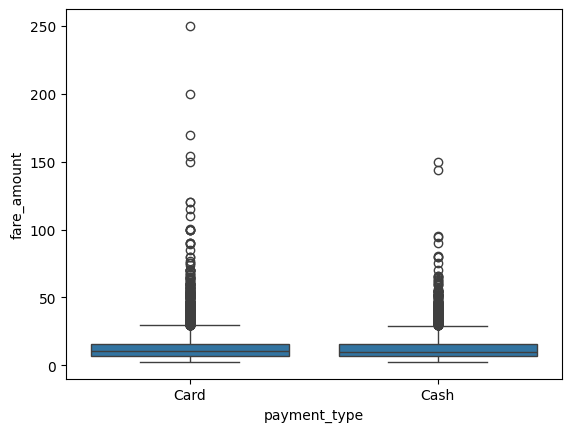

In [25]:
# check for the outliers
sns.boxplot(data=taxi_data, y="fare_amount", x="payment_type")
plt.show()

In [26]:
# removing outliers using interquartile range for the numerical variables
for col in ['trip_distance','fare_amount','duration']:
    Q1 = taxi_data[col].quantile(0.25)
    Q3 = taxi_data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    taxi_data = taxi_data[(taxi_data[col] >= lower_bound) & (taxi_data[col] <= upper_bound)]


We're interested on exploring the relationship between payment type and passenger behavior concerning trip distance and fare amount. Are there variations in the distribution of payment types concerning different fare amounts or trip distances?

To investigate this, we'll plot histograms to visualize the distribution of passenger counts paying with either card or cash. This will also provide stakeholders with insight into fare amount ranges associated with different payment methods.

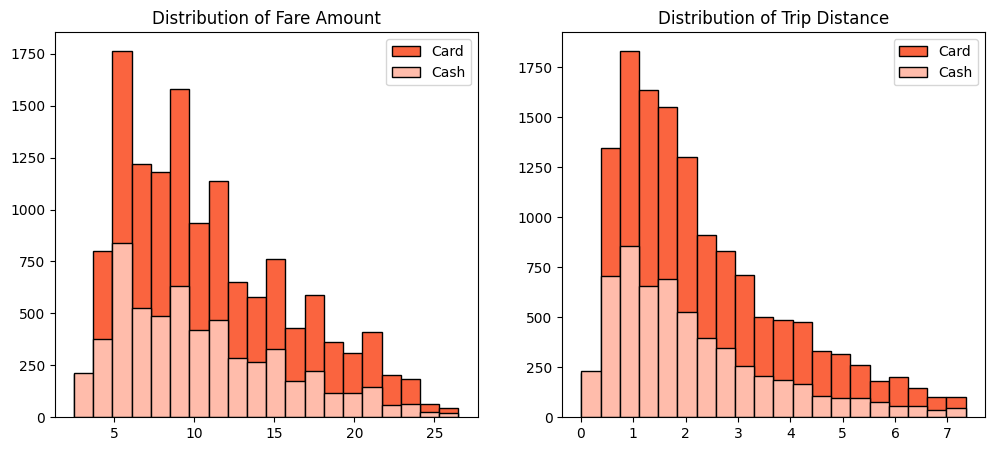

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           10.895555  5.193504      2.328026  1.574613
Cash           10.396266  5.102702      2.128491  1.539050

In [27]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of Fare Amount')
plt.hist(taxi_data[taxi_data['payment_type']=='Card']['fare_amount'], histtype='barstacked', bins = 20, edgecolor = 'k', color = '#FA643F', label = 'Card')
plt.hist(taxi_data[taxi_data['payment_type']=='Cash']['fare_amount'],  histtype='barstacked',bins = 20, edgecolor = 'k', color = '#FFBCAB',label = 'Cash')
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribution of Trip Distance')
plt.hist(taxi_data[taxi_data['payment_type']=='Card']['trip_distance'], histtype='barstacked', bins = 20, edgecolor = 'k',color = '#FA643F',label = 'Card')
plt.hist(taxi_data[taxi_data['payment_type']=='Cash']['trip_distance'],  histtype='barstacked',bins = 20, edgecolor = 'k', color = '#FFBCAB',label = 'Cash')
plt.legend()
plt.show()

# calculating the mean and standard deviation group by on payment type
taxi_data.groupby('payment_type').agg({'fare_amount': ['mean', 'std',], 'trip_distance': ['mean', 'std'],})

Now, in order to examine the passenger's preference regarding their choice of payment method, we will assess the proportion of the two payment types. To provide a visual representation, we have opted to utilize a pie chart. This graphical depiction will offer a clear and intuitive understanding of the distribution between the two payment methods chosen by passengers.


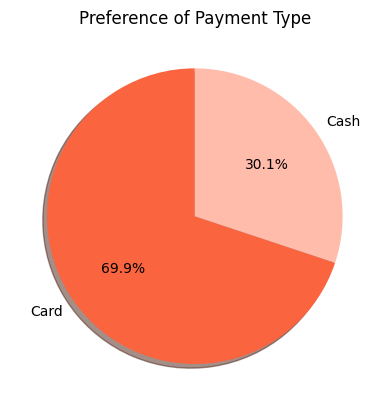

In [28]:
plt.title('Preference of Payment Type')
plt.pie(taxi_data['payment_type'].value_counts(normalize = True), labels = taxi_data['payment_type'].value_counts().index,
       startangle = 90,shadow = True, autopct = '%1.1f%%', colors = ['#FA643F','#FFBCAB'])
plt.show()

Subsequently, we aim to conduct an analysis of the payment types in relation to the passenger count. Our objective is to investigate if there are any changes in preference contingent upon the number of passengers traveling in the cab.

To facilitate this examination, we have employed a visualization technique known as a stacked bar plot. This method is particularly advantageous for comparing the percentage distribution of each passenger count based on the payment method selected. Through this graphical representation, we can gain insights into potential variations in payment preferences across different passenger counts.

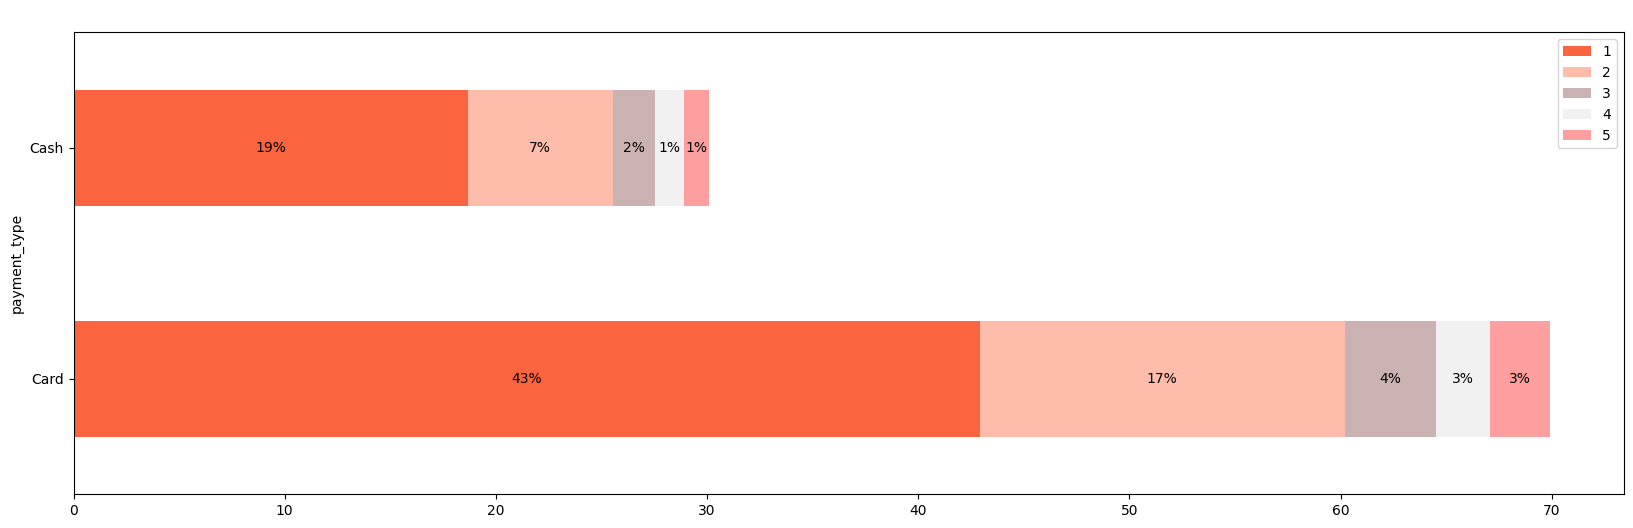

In [29]:
# calculating the total passenger count distribution based on the different payment type
passenger_count = taxi_data.groupby(['payment_type','passenger_count'])[['passenger_count']].count()

# renaming the passenger_count to count to reset the index
passenger_count.rename(columns = {'passenger_count':'count'},inplace = True)
passenger_count.reset_index(inplace = True)

# calculating the percentage of the each passenger count
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100

# creating a new empty dataframe to store the distribution of each payment type (useful for the visualization)
df = pd.DataFrame(columns = ['payment_type',1,2,3,4,5])
df['payment_type'] = ['Card','Cash']
df.iloc[0,1:] = passenger_count.iloc[:5,-1]
df.iloc[1,1:] = passenger_count.iloc[5:,-1]

fig, ax = plt.subplots(figsize=(20, 6))
df.plot(x='payment_type', kind='barh', stacked=True, title=' ', ax=ax, color = ['#FA643F', '#FFBCAB', '#CBB2B2', '#F1F1F1', '#FD9F9F'] )

# Add percentage text
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2,
            y + height / 2,
            '{:.0f}%'.format(width),
            horizontalalignment='center',
            verticalalignment='center')

# Hypothesis Testing

In order to select the most suitable test for our scenario, our initial step involves evaluating whether the distribution of fare amounts adheres to a normal distribution. While the histogram depicted above suggests otherwise, we will further confirm this by generating a QQ plot.

Quantile-quantile (QQ) plots can be used to assess whether the fare amount distributions for each payment type are approximately normally distributed. If the data points closely align with the diagonal line in the plot, it suggests that the data follows a normal distribution.

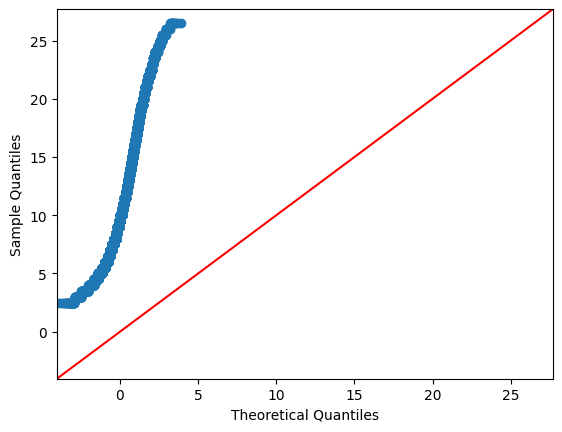

In [30]:
#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(taxi_data['fare_amount'], line='45')
plt.show()

The data values clearly do not follow the red 45-degree line, which is an indication that they do not follow a normal distribution. So, z distribution will not be good for this. That's why we will use T test.

Given that the T-test can be applied to both small and large samples and does not require the population standard deviation, it is a more universally applicable approach for hypothesis testing in many practical research scenarios, including analyses of taxi trip data.


In the analysis of NYC Yellow Taxi Trip Records, where you're likely dealing with an unknown population standard deviation and potentially large datasets, the T-test offers a more appropriate and flexible method for comparing means between two groups (e.g., fare amounts by payment type). It provides a reliable way to infer about the population, accommodating the uncertainty that comes with estimating population parameters from sample data.

**Null hypothesis**: There is no difference in average fare between customers who use credit cards and customers who use cash.

**Alternative hypothesis**: There is a difference in average fare between customers who use credit cards and customers who use cash



In [31]:
# sample 1
credit_card = taxi_data[taxi_data['payment_type'] == 'Card']['fare_amount']

# sample 2
cash = taxi_data[taxi_data['payment_type'] == 'Cash']['fare_amount']

# performing t test on both the different sample
t_stat, p_value = stats.ttest_ind(a=credit_card, b=cash, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# comparing the p value with the significance of 5% or 0.05
if p_value < 0.05:
    print("\nReject the null hypothesis")
else:
    print("\nAccept the null hypothesis")

T-statistic: 6.188222703531009, P-value: 6.298432212281582e-10

Reject the null hypothesis


Since the p-value is significantly smaller than the significance level of 5%, we will reject the null hypothesis.

You conclude that there is a statistically significant difference in the average fare amount between customers who use credit cards and customers who use cash.

The key business insight is that encouraging customers to pay with credit cards can generate more revenue for taxi cab drivers.